# `atonal`: A Computational Framework for Harmonic Analysis

The **`atonal`** package provides tools for exploring chords as structured data. It generates chord voicings, quantifies their relationships, and builds graph representations suitable for analysis and visualization.

## What is this about?

In traditional music theory, we think about chords functionally (tonic, dominant) or categorically (major, minor). `atonal` takes a different approach: it treats chords as **points in a discrete space** and builds **graphs** connecting them by musical criteria.

This enables:
- **Systematic enumeration**: Generate all possible chords within defined constraints
- **Quantitative analysis**: Measure similarity between chords (shared notes, voice-leading distance)
- **Graph construction**: Build networks of chords connected by musical relationships
- **Data-driven exploration**: Use modern data science tools to study harmonic structure

## Key Concepts

- **Pitch class**: Notes modulo octave (0=C, 1=C♯, ..., 11=B)
- **Voicing**: An ordered tuple of pitches, e.g., `(0, 4, 7)` for a C major triad
- **Pitch-class set (pc-set)**: The unordered set of pitch classes in a chord
- **Interval vector**: A numerical "fingerprint" capturing a chord's interval content
- **Links**: Connections between chords based on shared notes, subset relations, or voice-leading proximity

## What you'll learn

This notebook demonstrates how to:
1. Generate chord voicings systematically
2. Extract musical features from chords
3. Build chord tables with automatic feature computation
4. Compute links between chords (shared tones, voice-leading, subsets)
5. Create large datasets for analysis and visualization
6. Visualize chord networks with customizable parameters

Let's start with the basics...

## 1. Basic Building Blocks: Pitch-Class Combinations

First, let's explore the theoretical space of pitch-class sets. The `pc_combinations` function generates all possible k-element subsets of the 12 pitch classes.

In [1]:
from atonal.base import pc_combinations, all_pc_combinations

# How many 3-note chords (triads) are theoretically possible?
triads = pc_combinations(3)
print(f"Number of 3-note pitch-class sets: {len(triads)}")
print(f"Examples: {list(triads)[:5]}")

# Check if C major triad {0, 4, 7} is in there
print(f"\nC major {frozenset({0, 4, 7})} in triads: {frozenset({0, 4, 7}) in triads}")

Number of 3-note pitch-class sets: 220
Examples: [frozenset({0, 1, 2}), frozenset({0, 1, 3}), frozenset({0, 1, 4}), frozenset({0, 1, 5}), frozenset({0, 1, 6})]

C major frozenset({0, 4, 7}) in triads: True


## 2. Generating Voicings: Interval Stacking

Pitch-class sets are abstract. To make them concrete, we need **voicings**—specific arrangements of pitches in a range. The `interval_stack_voicings` function builds voicings by stacking intervals from a root note.

In [2]:
from atonal.base import interval_stack_voicings

# Generate voicings within one octave, using common intervals
voicings = interval_stack_voicings(
    root=0,                           # Start from C (0)
    max_semitones=12,                 # Within one octave
    allowed_intervals=(3, 4, 5, 7),   # Minor 3rd, major 3rd, perfect 4th, perfect 5th
    max_notes=4,                      # Up to 4 notes
    min_notes=2                       # At least 2 notes
)

print(f"Generated {len(voicings)} voicings")
print(f"Examples: {voicings[:10]}")

# Check for specific voicings
print(f"\nC major triad (0, 4, 7): {(0, 4, 7) in voicings}")
print(f"C minor triad (0, 3, 7): {(0, 3, 7) in voicings}")

Generated 36 voicings
Examples: [(0, 3), (0, 3, 6), (0, 3, 6, 9), (0, 3, 6, 10), (0, 3, 6, 11), (0, 3, 7), (0, 3, 7, 10), (0, 3, 7, 11), (0, 3, 7, 12), (0, 3, 8)]

C major triad (0, 4, 7): True
C minor triad (0, 3, 7): True


## 3. Measuring Chord Similarity

How "similar" are two chords? `atonal` provides several metrics:

- **Shared pitch classes**: How many notes in common?
- **Voice-leading distance**: How far do the notes have to move?
- **Subset relation**: Is one chord contained in another?

In [3]:
from atonal.base import shared_pcs, voice_leading_distance, is_subset_pcs

# Define some chords
c_major = (0, 4, 7)        # C E G
c_minor = (0, 3, 7)        # C Eb G  
c_maj7 = (0, 4, 7, 11)     # C E G B
g_major = (7, 11, 14)      # G B D (next octave)

# Shared pitch classes
print("Shared pitch classes:")
print(f"  C major vs C minor: {shared_pcs(c_major, c_minor)} notes")
print(f"  C major vs C maj7: {shared_pcs(c_major, c_maj7)} notes")
print(f"  C major vs G major: {shared_pcs(c_major, g_major)} notes")

# Voice-leading distance
print("\nVoice-leading distance (semitones):")
print(f"  C major → C minor: {voice_leading_distance(c_major, c_minor)}")
print(f"  C major → G major: {voice_leading_distance(c_major, g_major)}")

# Subset relations
print("\nSubset relations:")
print(f"  C major ⊆ C maj7: {is_subset_pcs(c_major, c_maj7)}")
print(f"  C maj7 ⊆ C major: {is_subset_pcs(c_maj7, c_major)}")

Shared pitch classes:
  C major vs C minor: 2 notes
  C major vs C maj7: 3 notes
  C major vs G major: 1 notes

Voice-leading distance (semitones):
  C major → C minor: 1
  C major → G major: 21

Subset relations:
  C major ⊆ C maj7: True
  C maj7 ⊆ C major: False


## 4. Chord Tables: Structured Data for Analysis

The `chord_table` function transforms voicings into structured data, automatically computing features like:
- Number of notes and pitch classes
- Span (range in semitones)
- Interval vector (interval content)
- Optional: Links to other chords

This is where `atonal` becomes powerful for data analysis.

In [4]:
from atonal.base import chord_table
import pandas as pd

# Start with a small set of chords
voicings = [
    (0, 4, 7),      # C major
    (0, 3, 7),      # C minor
    (0, 5, 9),      # C suspended
    (0, 4, 7, 11),  # C major 7
]

# Generate a chord table
df = chord_table(voicings=voicings, use_pandas=True)

print("Chord table with automatic features:")
print(df[['id_', 'voicing', 'n_notes', 'span', 'n_pcs']])

Chord table with automatic features:
   id_        voicing  n_notes  span  n_pcs
0    0      (0, 4, 7)        3     7      3
1    1      (0, 3, 7)        3     7      3
2    2      (0, 5, 9)        3     9      3
3    3  (0, 4, 7, 11)        4    11      4


In [5]:
# Look at the interval vectors (numeric "fingerprints")
print("\nInterval vectors (counts of each interval class 1-6):")
for idx, row in df.iterrows():
    print(f"  {row['voicing']}: {row['interval_vector']}")


Interval vectors (counts of each interval class 1-6):
  (0, 4, 7): [0, 0, 1, 1, 1, 0]
  (0, 3, 7): [0, 0, 1, 1, 1, 0]
  (0, 5, 9): [0, 0, 1, 1, 1, 0]
  (0, 4, 7, 11): [1, 0, 1, 2, 2, 0]


## 5. Computing Links Between Chords

Links connect chords into networks. You can compute links either:
1. **During table generation** (integrated)
2. **Separately** (more flexible for experimenting with parameters)

In [5]:
from atonal.base import compute_links

# Method 1: Add links during table generation
df_with_links = chord_table(
    voicings=voicings,
    include_links=True,
    link_kinds=["shared", "voiceleading"],
    min_shared_pcs=2,
    max_vl_distance=2,
    use_pandas=True
)

print("Chords with links:")
for idx, row in df_with_links.iterrows():
    print(f"\n{row['voicing']}:")
    print(f"  Shares ≥2 notes with: {row['shared_links']}")
    print(f"  Voice-leading (≤2 semitones) to: {row['voiceleading_links']}")

Chords with links:

(0, 4, 7):
  Shares ≥2 notes with: [1, 3]
  Voice-leading (≤2 semitones) to: [1, 3]

(0, 3, 7):
  Shares ≥2 notes with: [0, 3]
  Voice-leading (≤2 semitones) to: [0, 3]

(0, 5, 9):
  Shares ≥2 notes with: []
  Voice-leading (≤2 semitones) to: []

(0, 4, 7, 11):
  Shares ≥2 notes with: [0, 1]
  Voice-leading (≤2 semitones) to: [0, 1]


In [6]:
# Method 2: Compute links separately (good for experimentation)
base_table = chord_table(voicings=voicings, use_pandas=True)

# Try different link criteria
strict_shared = compute_links(base_table, kind="shared", min_shared_pcs=3)
any_shared = compute_links(base_table, kind="shared", min_shared_pcs=1)
subset = compute_links(base_table, kind="subset")
codiatonic = compute_links(base_table, kind="codiatonic")  # Both fit in same major scale

print("Different link criteria for same chords:")
print(f"  Strict shared (≥3 notes): {strict_shared}")
print(f"  Any shared (≥1 note): {any_shared}")
print(f"  Subset relations: {subset}")
print(f"  Codiatonic (share a major scale): {codiatonic}")

Different link criteria for same chords:
  Strict shared (≥3 notes): [[3], [], [], [0]]
  Any shared (≥1 note): [[1, 2, 3], [0, 2, 3], [0, 1, 3], [0, 1, 2]]
  Subset relations: [[3], [], [], []]
  Codiatonic (share a major scale): [[2, 3], [2], [0, 1, 3], [0, 2]]


### Open-Closed Design: Custom Link Functions

The `atonal` module follows the **open-closed principle**: you can extend it with custom link definitions without modifying the core code. 

Built-in link types:
- **`"shared"`**: Chords sharing ≥ N pitch classes
- **`"subset"`**: One chord's pitch-class set is a subset of another's
- **`"voiceleading"`**: Voice-leading distance ≤ N semitones
- **`"codiatonic"`**: Both chords fit within the same major scale

You can also pass **custom functions** that define your own musical relationships. The function signature is:
```python
def my_link(i: int, j: int, voicings: List, pc_sets: List, **kwargs) -> bool:
    # i, j: chord indices
    # voicings: list of (pitch, pitch, ...) tuples
    # pc_sets: list of {pitch_class} sets for efficiency
    # kwargs: includes min_shared_pcs, max_vl_distance
    # returns: True if chords i and j should be linked
    pass
```

In [7]:
# Example: Define a custom link function
def parallel_motion(i, j, voicings, pc_sets, **kwargs):
    """
    Link chords that move in parallel (all voices move by same interval).
    """
    v1, v2 = voicings[i], voicings[j]
    if len(v1) != len(v2):
        return False
    
    # Check if all voices move by the same interval
    intervals = [v2[k] - v1[k] for k in range(len(v1))]
    return len(set(intervals)) == 1 and intervals[0] != 0

# Use the custom function
parallel_links = compute_links(base_table, kind=parallel_motion)

print(f"\nCustom 'parallel_motion' links: {parallel_links}")

# You can even create more complex relationships
def similar_span(i, j, voicings, pc_sets, max_span_diff=2, **kwargs):
    """Link chords with similar span (range)."""
    span_i = max(voicings[i]) - min(voicings[i]) if len(voicings[i]) > 1 else 0
    span_j = max(voicings[j]) - min(voicings[j]) if len(voicings[j]) > 1 else 0
    return abs(span_i - span_j) <= max_span_diff

similar_span_links = compute_links(base_table, kind=similar_span)
print(f"Custom 'similar_span' links: {similar_span_links}")


Custom 'parallel_motion' links: [[], [], [], []]
Custom 'similar_span' links: [[1, 2], [0, 2], [0, 1, 3], [2]]


## 6. Generating Larger Datasets

Now let's scale up and generate a richer chord space for analysis and visualization. The `generate_default_voicing_space` function creates a comprehensive set of voicings.

In [8]:
from atonal.base import generate_default_voicing_space

# Generate a default chord space (this takes a moment...)
all_voicings = generate_default_voicing_space()
print(f"Generated {len(all_voicings)} voicings")
print(f"Examples: {all_voicings[:5]}")

Generated 3782 voicings
Examples: [(0, 1, 2, 4, 6, 13), (0, 1, 2, 4, 8, 13), (0, 1, 2, 4, 9, 13), (0, 1, 2, 4, 11, 13), (0, 1, 2, 5, 8, 13)]


## 7. Visualizing Chord Networks

Let's visualize our chord space as a network graph. We'll use different visual encodings to reveal structure.

### Customizing Your Dataset

You can control every aspect of the generated data. Edit the configuration object below to create your ideal dataset:

In [8]:
from dataclasses import dataclass
from typing import Tuple, List, Union, Callable

@dataclass
class AtonalConfig:
    """Configuration for generating chord space datasets."""
    
    # Voicing generation parameters
    root: int = 0                                      # Starting pitch (0 = C)
    max_semitones: int = 24                           # Range in semitones (24 = 2 octaves)
    allowed_intervals: Tuple[int, ...] = (2, 3, 4, 5, 7)  # Intervals to stack (2=M2, 3=m3, 4=M3, 5=P4, 7=P5)
    min_notes: int = 3                                 # Minimum chord size
    max_notes: int = 5                                 # Maximum chord size
    
    # Link computation parameters
    compute_links: bool = True                         # Whether to compute links
    link_kinds: List[Union[str, Callable]] = None      # Link types (see below)
    min_shared_pcs: int = 2                            # Minimum shared notes for "shared" links
    max_vl_distance: int = 3                           # Maximum voice-leading distance (semitones)
    
    # Dataset size control
    max_voicings: int = 200                            # Limit dataset size for faster computation
    use_pandas: bool = True                            # Output as DataFrame (vs generator)
    
    def __post_init__(self):
        if self.link_kinds is None:
            self.link_kinds = ["shared", "voiceleading"]

# Link types can be:
#   - Strings: "shared", "subset", "voiceleading", "codiatonic" 
#   - Custom callables: (i, j, voicings, pc_sets, **kwargs) -> bool

# Create a default configuration object (edit values as needed)
dflt_config = AtonalConfig()

print(f"Configuration created: {dflt_config.max_voicings} voicings max, links={dflt_config.compute_links}")
print(f"Intervals: {dflt_config.allowed_intervals}, chord sizes: {dflt_config.min_notes}-{dflt_config.max_notes}")
print(f"Link types: {dflt_config.link_kinds}")

Configuration created: 200 voicings max, links=True
Intervals: (2, 3, 4, 5, 7), chord sizes: 3-5
Link types: ['shared', 'voiceleading']


### Configure

In [9]:
# Example: Custom link function for "nearby root notes"
def nearby_roots(i, j, voicings, pc_sets, **kwargs):
    """Link chords whose root notes (first pitch) are within 2 semitones."""
    root_i = voicings[i][0] % 12
    root_j = voicings[j][0] % 12
    distance = min(abs(root_i - root_j), 12 - abs(root_i - root_j))
    return distance <= 2

# You can mix built-in and custom link types
config_with_custom = AtonalConfig(
    link_kinds=["codiatonic", nearby_roots],  # Built-in + custom
    max_voicings=100
)

print("Config with mixed link types:")
print(f"  Link kinds: {[k if isinstance(k, str) else k.__name__ for k in config_with_custom.link_kinds]}")

Config with mixed link types:
  Link kinds: ['codiatonic', 'nearby_roots']


#### Link Types: Built-in and Custom

Link types can be:
- **Built-in strings**: `"shared"`, `"subset"`, `"voiceleading"`, `"codiatonic"`
- **Custom functions**: Write your own with signature `(i, j, voicings, pc_sets, **kwargs) -> bool`

Examples:

#### Option 1: Use the Default Configuration

In [10]:
config = dflt_config

#### Option 2: Use a Pre-defined Configuration

Here are some example configurations:

In [11]:
# Use built-in link types
config = AtonalConfig(
    link_kinds=["shared", "voiceleading", "codiatonic"],  # Multiple built-in types
    max_voicings=150
)

In [12]:
# Codiatonic-focused config (chords that fit together in major scales)
config = AtonalConfig(
    allowed_intervals=(2, 3, 4, 5, 7), 
    min_notes=2,
    max_notes=4,
    link_kinds=["codiatonic"],
    max_voicings=100
)


In [13]:
# Or: Voice-leading focused config
config = AtonalConfig(
    link_kinds=["voiceleading"],
    max_vl_distance=2,  # Very smooth voice leading
    max_voicings=200
)


In [14]:
# Or: Multi-relationship config
config = AtonalConfig(
    link_kinds=["shared", "voiceleading", "codiatonic"],
    max_voicings=100
)

#### See the config

In [15]:
print(f"Configuration created: {config.max_voicings} voicings max, links={config.compute_links}")
print(f"Intervals: {config.allowed_intervals}, chord sizes: {config.min_notes}-{config.max_notes}")

Configuration created: 100 voicings max, links=True
Intervals: (2, 3, 4, 5, 7), chord sizes: 3-5


### Generate the Dataset

In [16]:
from atonal.base import interval_stack_voicings, chord_table

# Generate voicings with your configuration
custom_voicings = interval_stack_voicings(
    root=config.root,
    max_semitones=config.max_semitones,
    allowed_intervals=config.allowed_intervals,
    max_notes=config.max_notes,
    min_notes=config.min_notes,
)

# Limit size if needed
if len(custom_voicings) > config.max_voicings:
    print(f"Limiting from {len(custom_voicings)} to {config.max_voicings} voicings for performance")
    custom_voicings = custom_voicings[:config.max_voicings]

# Generate the chord table
chord_df = chord_table(
    voicings=custom_voicings,
    include_links=config.compute_links,
    link_kinds=config.link_kinds if config.compute_links else None,
    min_shared_pcs=config.min_shared_pcs,
    max_vl_distance=config.max_vl_distance,
    use_pandas=config.use_pandas
)

print(f"✓ Generated dataset with {len(chord_df)} chords")
print(f"\nColumns: {list(chord_df.columns)}")
print(f"\nFirst few rows:")
chord_df.head()

Limiting from 766 to 100 voicings for performance
✓ Generated dataset with 100 chords

Columns: ['id_', 'voicing', 'n_notes', 'span', 'pitch_classes', 'n_pcs', 'interval_vector', 'shared_links', 'voiceleading_links', 'codiatonic_links']

First few rows:


id_           voicing  n_notes  span     pitch_classes  n_pcs  \
0    0         (0, 2, 4)        3     4         [0, 2, 4]      3   
1    1      (0, 2, 4, 6)        4     6      [0, 2, 4, 6]      4   
2    2   (0, 2, 4, 6, 8)        5     8   [0, 2, 4, 6, 8]      5   
3    3   (0, 2, 4, 6, 9)        5     9   [0, 2, 4, 6, 9]      5   
4    4  (0, 2, 4, 6, 10)        5    10  [0, 2, 4, 6, 10]      5   

      interval_vector                                       shared_links  \
0  [0, 2, 0, 1, 0, 0]  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
1  [0, 3, 0, 2, 0, 2]  [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
2  [0, 4, 0, 4, 0, 4]  [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
3  [0, 3, 2, 2, 2, 2]  [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
4  [0, 4, 0, 4, 0, 4]  [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   

                                  voiceleading_links  \
0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
1  [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
2  [0, 1, 3, 4, 5, 7, 8, 9, 13, 19, 31, 32, 33, 3...   
3  [0, 1, 2, 4, 5, 7, 8, 9, 10, 13, 14, 19, 31, 3...   
4  [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...   

                                    codiatonic_links  
0  [1, 3, 5, 7, 8, 9, 10, 11, 12, 19, 20, 21, 23,...  
1  [0, 3, 5, 7, 8, 10, 11, 12, 19, 20, 21, 23, 24...  
2                                                 []  
3  [0, 1, 5, 7, 8, 10, 11, 12, 19, 20, 21, 23, 24...  
4                                                 []

# Visualizing with cosmograph

In [28]:
from cosmograph import cosmo 

from cosmograph import cosmo 
import tabled 
import pandas as pd 

links_column = 'codiatonic_links'
vl_links = tabled.expand_rows(chord_df[['id_', links_column]], links_column)

cosmo(links=vl_links, point_id_by='id_',  link_source_by='id_', link_target_by=links_column, point_size_scale=0.1)

Cosmograph(background_color=None, components_display_state_mode=None, focused_point_ring_color=None, hovered_p…

In [ ]:
import linked

# Visualizing with networkx

## Make the (networkx) graph

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Build a network from chord links
def build_network(df, link_column='shared_links'):
    """Build a NetworkX graph from a chord DataFrame."""
    G = nx.Graph()
    
    # Add nodes (chords) with attributes
    for idx, row in df.iterrows():
        G.add_node(
            row['id_'],
            voicing=row['voicing'],
            n_notes=row['n_notes'],
            span=row['span'],
            n_pcs=row['n_pcs']
        )
    
    # Add edges (links)
    if link_column in df.columns:
        for idx, row in df.iterrows():
            for target_id in row[link_column]:
                G.add_edge(row['id_'], target_id)
    
    return G

# Build network from the first available link type
if config.compute_links and 'chord_df' in dir():
    # Find first link column
    link_columns = [col for col in chord_df.columns if col.endswith('_links')]
    if link_columns:
        G = build_network(chord_df, link_columns[0])
        print(f"Network created from '{link_columns[0]}': {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    else:
        print("No link columns found. Set config.compute_links=True and regenerate dataset.")
else:
    print("Generate a dataset first (run the 'Generate the Dataset' cell above)")

Network created from 'codiatonic_links': 150 nodes, 5062 edges


### Visualization 1: Node Size = Number of Notes

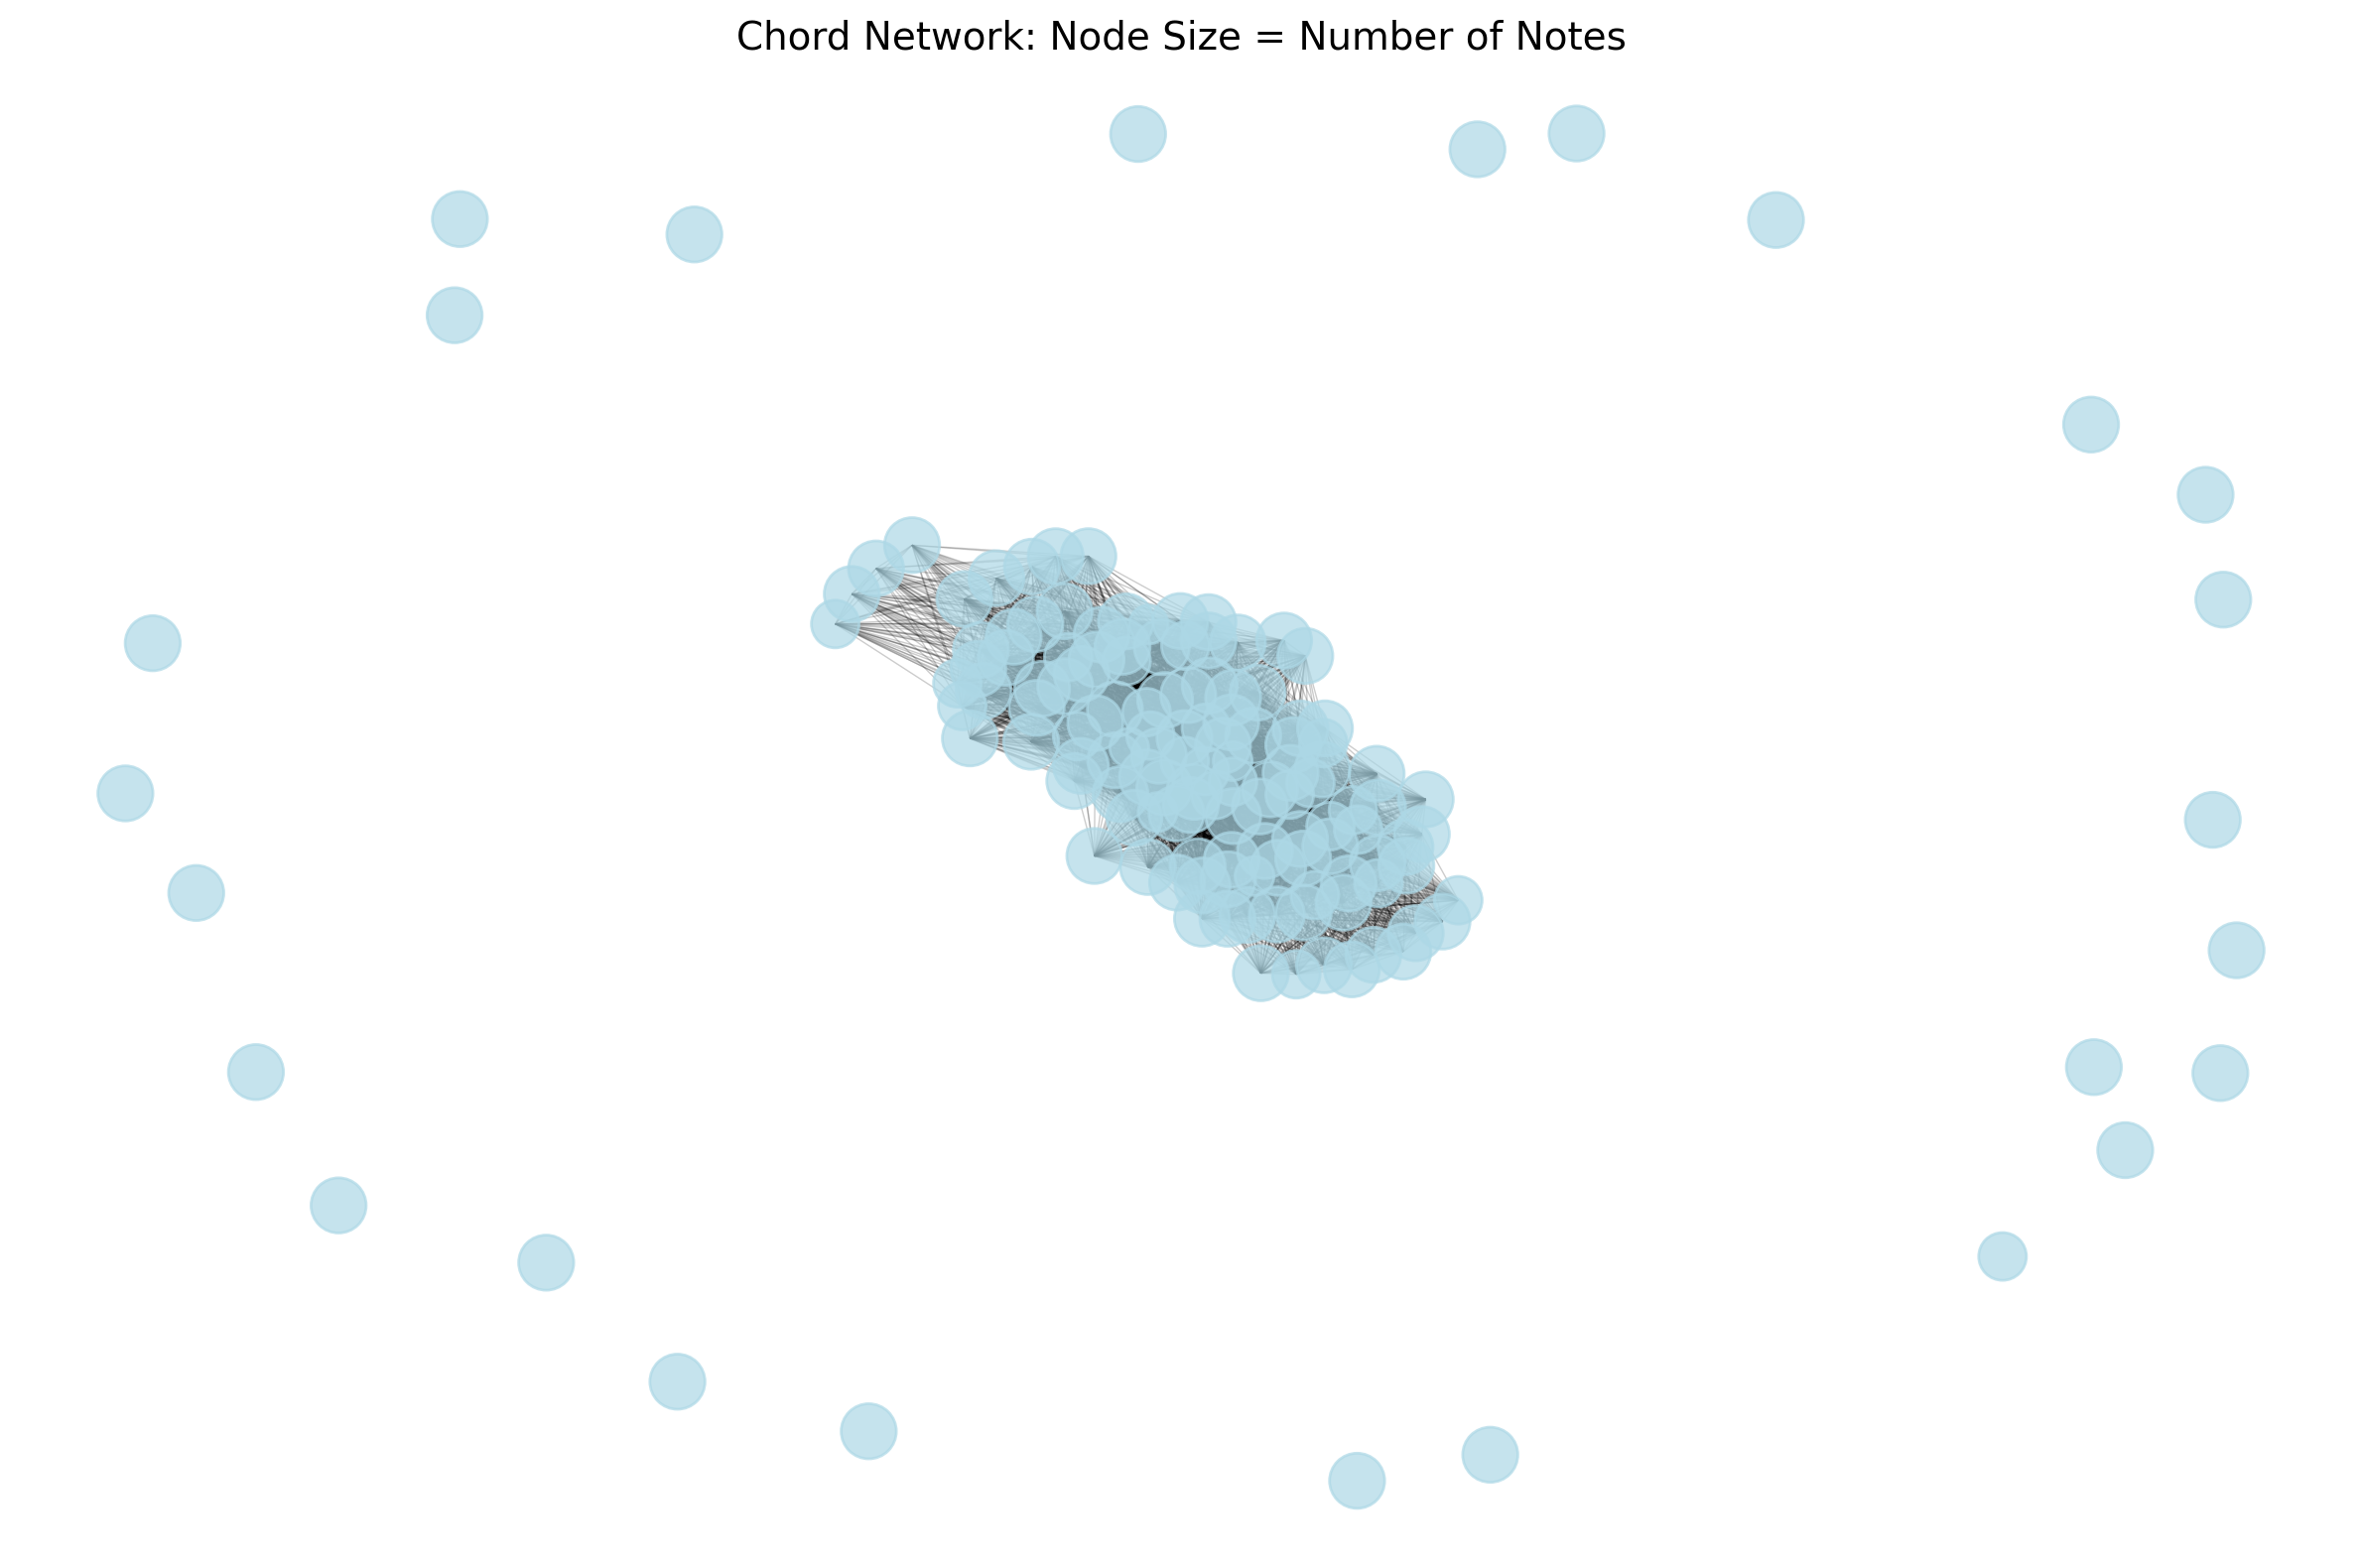

In [25]:
if 'G' in dir() and G.number_of_nodes() > 0:
    plt.figure(figsize=(12, 8))
    
    # Position nodes using spring layout
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)
    
    # Node sizes based on number of notes
    node_sizes = [G.nodes[node]['n_notes'] * 100 for node in G.nodes()]
    
    # Draw the network
    nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                           node_color='lightblue', alpha=0.7)
    
    # Optionally add labels for small networks
    if G.number_of_nodes() <= 30:
        labels = {node: str(G.nodes[node]['voicing']) for node in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=6)
    
    plt.title("Chord Network: Node Size = Number of Notes", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Build the network first (run the previous cell)")

### Visualization 2: Node Color = Span (Range)

In [ ]:
if 'G' in dir() and G.number_of_nodes() > 0:
    plt.figure(figsize=(12, 8))
    
    # Use same positions for consistency
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)
    
    # Node colors based on span
    node_colors = [G.nodes[node]['span'] for node in G.nodes()]
    
    # Draw
    nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200,
                                    node_color=node_colors, 
                                    cmap='viridis', alpha=0.8)
    
    plt.colorbar(nodes, label='Span (semitones)')
    plt.title("Chord Network: Node Color = Span (Range in Semitones)", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Build the network first (run the network-building cell above)")

Generate a dataset with config.compute_links=True first


### Visualization 3: Degree Centrality (Connectivity)

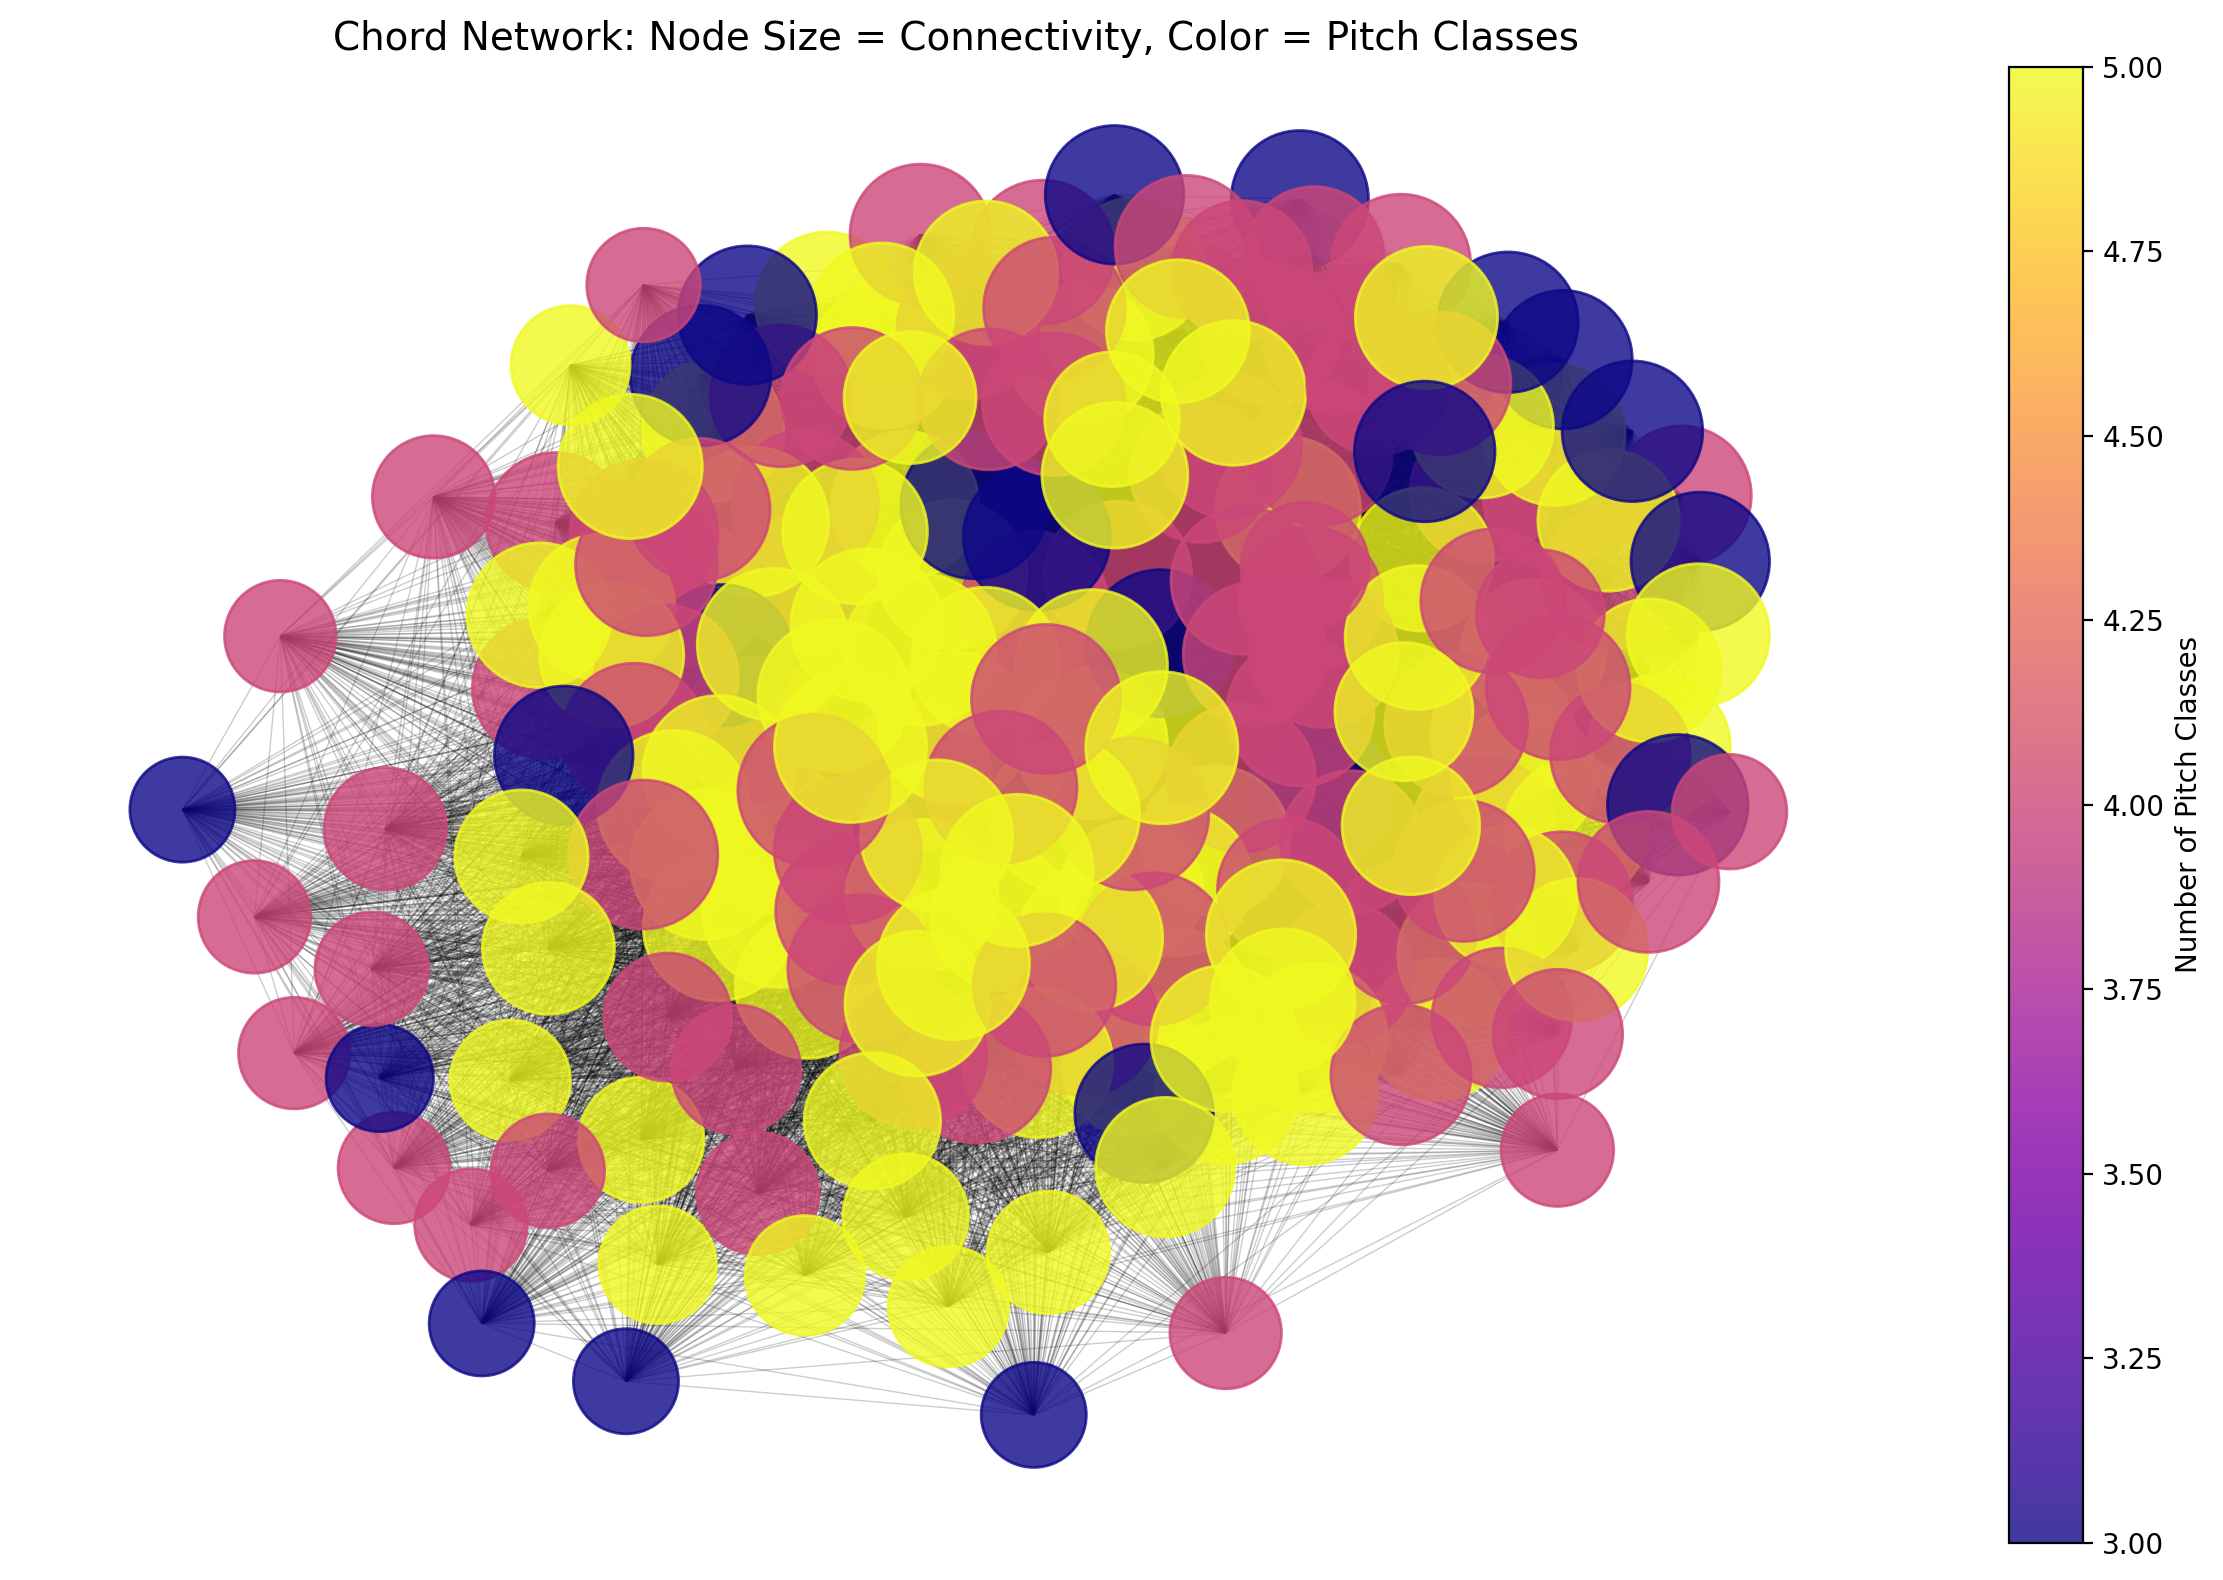


Most connected chords:
  (0, 2, 4, 8, 15): 199 connections (centrality=1.000)
  (0, 2, 4, 11, 15): 199 connections (centrality=1.000)
  (0, 2, 5, 8, 15): 199 connections (centrality=1.000)
  (0, 2, 5, 10, 15): 199 connections (centrality=1.000)
  (0, 2, 5, 12, 15): 199 connections (centrality=1.000)


In [ ]:
if 'G' in dir() and G.number_of_nodes() > 0:
    plt.figure(figsize=(12, 8))
    
    # Calculate degree centrality (how connected each node is)
    degree_cent = nx.degree_centrality(G)
    
    # Node sizes proportional to degree
    node_sizes = [degree_cent[node] * 3000 for node in G.nodes()]
    
    # Node colors by number of pitch classes
    node_colors = [G.nodes[node]['n_pcs'] for node in G.nodes()]
    
    # Draw
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)
    nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                                    node_color=node_colors,
                                    cmap='plasma', alpha=0.8)
    
    plt.colorbar(nodes, label='Number of Pitch Classes')
    plt.title("Chord Network: Node Size = Connectivity, Color = Pitch Classes", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Show most connected chords
    top_5 = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]
    print("\nMost connected chords:")
    for node_id, centrality in top_5:
        voicing = G.nodes[node_id]['voicing']
        degree = G.degree(node_id)
        print(f"  {voicing}: {degree} connections (centrality={centrality:.3f})")
else:
    print("Build the network first (run the network-building cell above)")

### Visualization 4: Comparing Link Types

Let's see how different link definitions create different network structures.

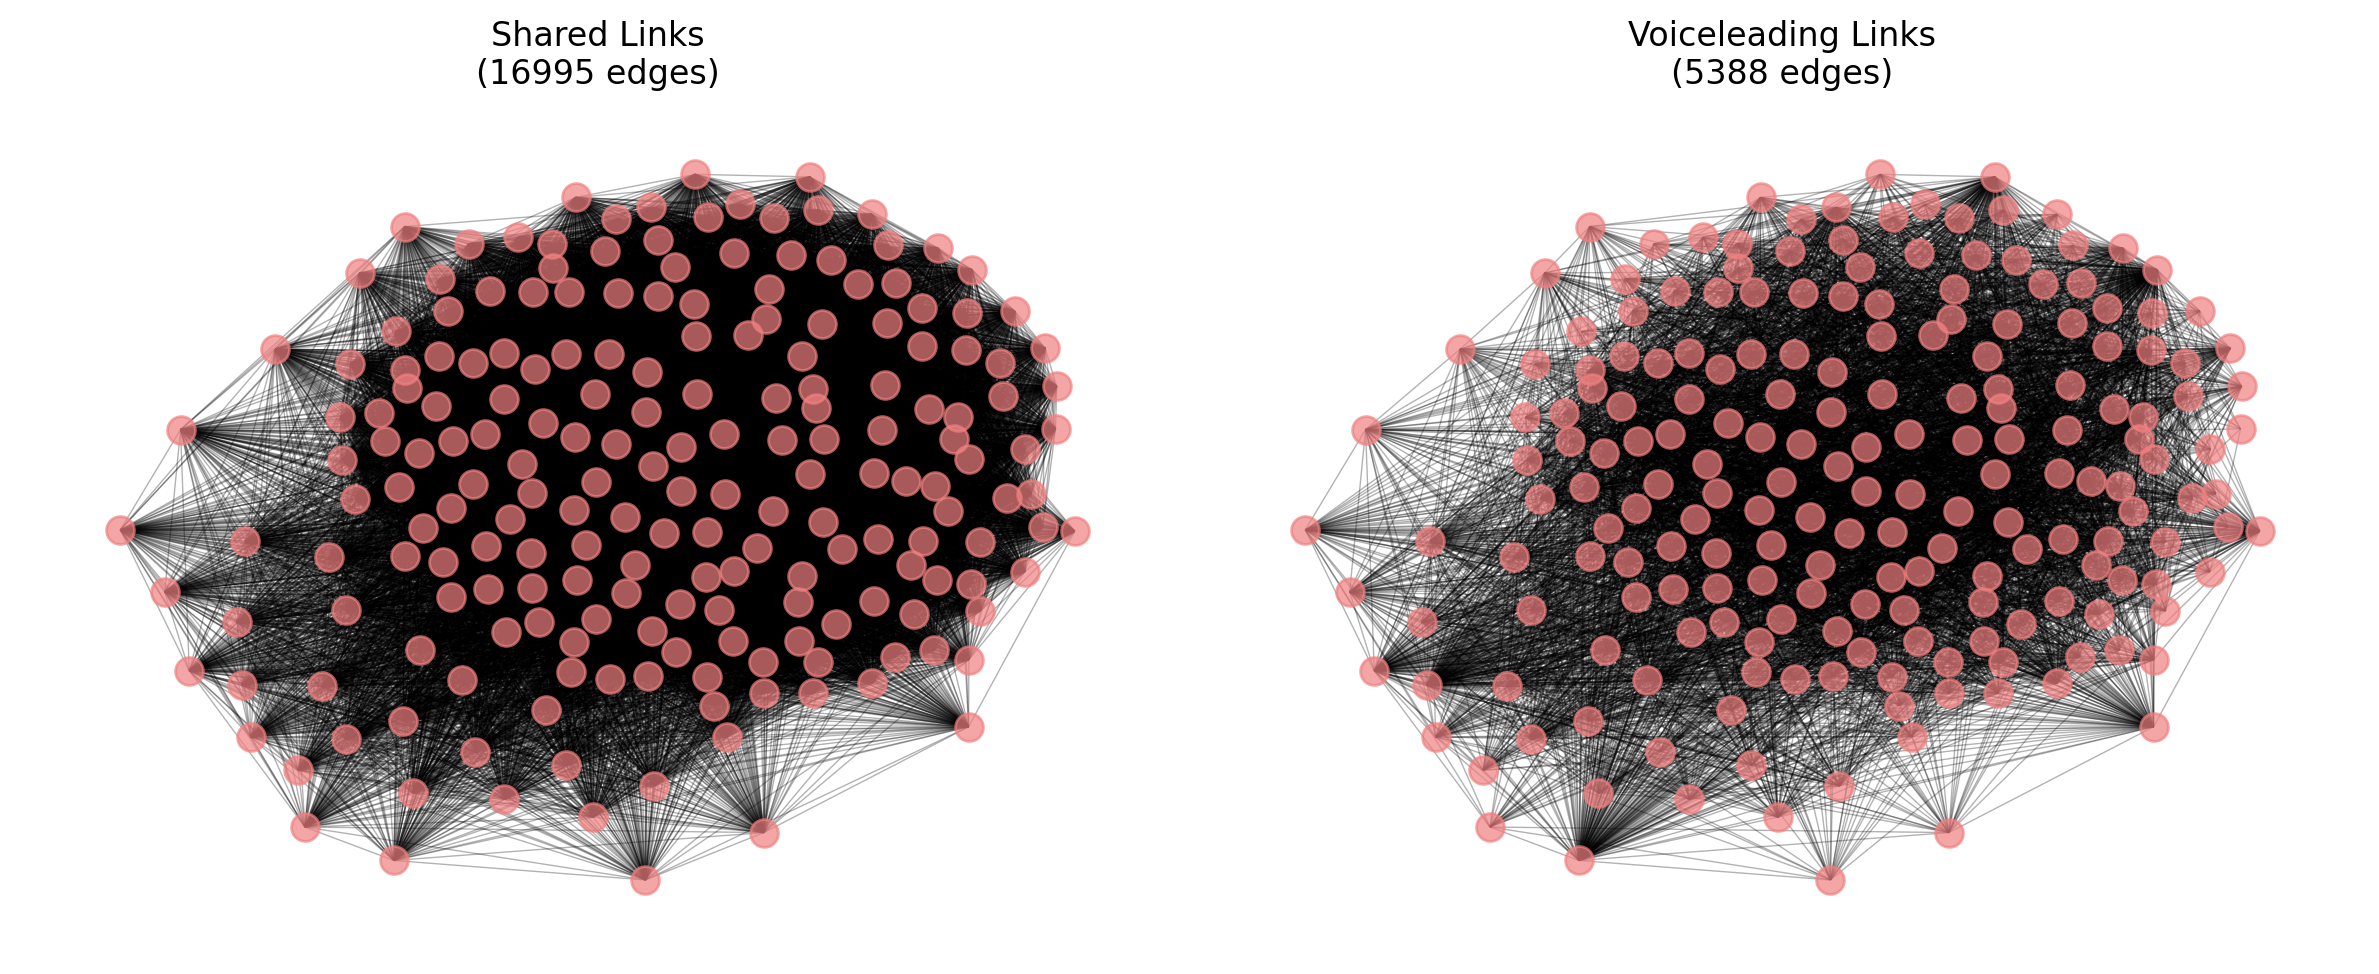


Network statistics by link type:
  shared: 16995 edges, avg degree = 169.9
  voiceleading: 5388 edges, avg degree = 53.9


In [ ]:
if 'chord_df' in dir() and config.compute_links and len(config.link_kinds) > 1:
    fig, axes = plt.subplots(1, len(config.link_kinds), figsize=(6*len(config.link_kinds), 5))
    if len(config.link_kinds) == 1:
        axes = [axes]
    
    # Use existing G for layout consistency
    if 'G' in dir():
        pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)
    else:
        pos = None
    
    for idx, link_kind in enumerate(config.link_kinds):
        # Handle both string and callable link kinds
        link_name = link_kind if isinstance(link_kind, str) else link_kind.__name__
        link_col = f"{link_name}_links"
        
        if link_col in chord_df.columns:
            # Build network for this link type
            G_link = build_network(chord_df, link_col)
            
            # Use consistent layout if available
            if pos is None:
                pos = nx.spring_layout(G_link, k=0.5, iterations=50, seed=42)
            
            ax = axes[idx]
            plt.sca(ax)
            
            # Draw
            nx.draw_networkx_edges(G_link, pos, alpha=0.3, width=0.5)
            nx.draw_networkx_nodes(G_link, pos, node_size=100,
                                   node_color='lightcoral', alpha=0.7)
            
            ax.set_title(f"{link_name.capitalize()} Links\n({G_link.number_of_edges()} edges)")
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print("\nNetwork statistics by link type:")
    for link_kind in config.link_kinds:
        link_name = link_kind if isinstance(link_kind, str) else link_kind.__name__
        link_col = f"{link_name}_links"
        if link_col in chord_df.columns:
            G_link = build_network(chord_df, link_col)
            avg_degree = sum(dict(G_link.degree()).values()) / G_link.number_of_nodes()
            print(f"  {link_name}: {G_link.number_of_edges()} edges, avg degree = {avg_degree:.1f}")
else:
    print("Generate a dataset with multiple link types (len(config.link_kinds) > 1) and regenerate to compare")

In [23]:
from cosmograph import cosmo 
import tabled 
import pandas as pd 

chord_df = pd.read_parquet('~/Downloads/chord_df.parquet')
vl_links = tabled.expand_rows(chord_df[['id_', 'voiceleading_links']], 'voiceleading_links')

# cosmo(links=vl_links)

## Next Steps

You now have the tools to:
- Generate custom chord spaces with any parameters
- Compute multiple types of relationships between chords
- Visualize chord networks with different encodings
- Analyze the structure of harmonic space

### Ideas for Further Exploration

1. **Cluster Analysis**: Use interval vectors to cluster chords by similarity
2. **Dimension Reduction**: Apply PCA/UMAP to embed chords in 2D/3D space
3. **Path Finding**: Find optimal voice-leading paths between distant chords
4. **Style Analysis**: Compare chord spaces from different musical genres
5. **Generative Models**: Train ML models on chord progressions

The `atonal` module provides the foundation—the rest is up to your creativity!